In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report as cr

In [2]:
df=pd.read_csv('./Datasets/Question-5/train(1).csv')

In [3]:
df.head()

,Unnamed: 0,text,author
0,0,The sight of the military restored hope to tho...,MWS
1,1,Just as the building was wiped out by a German...,HPL
2,2,Do you wonder how it will seem?,HPL
3,3,"My revenge is of no moment to you; yet, while ...",MWS
4,4,"If he dares to reply, you can tell him from Lu...",EAP


In [4]:
df.shape

(15663, 3)

In [5]:
df=df.drop(df.columns[0],axis=1)
print(df.shape)

(15663, 2)


In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(df['text'],df['author'], test_size=0.2,random_state=40)

In [7]:
print(X_train.shape)
print(X_train.head())
print(X_test.shape)
print(X_test.head())
print(Y_train.shape)
print(Y_train.head())
print(Y_test.shape)
print(Y_test.head())

(12530,)
1728     We were now thoroughly broken down; but the in...
15113    I had a curious desire to look out of that win...
15122                    I dwelt upon their peculiarities.
9402     You say that "but for the necessity of the rud...
9584     Thus ran his discourse, until with the greates...
Name: text, dtype: object
(3133,)
1147     I was indignant that he should sit at the same...
15307    My senses were gratified and refreshed by a th...
4282     Barring the door after us against the fury of ...
1250     Told abaout an island east of Otaheité whar th...
324      I at once offered to purchase it of the landlo...
Name: text, dtype: object
(12530,)
1728     EAP
15113    HPL
15122    EAP
9402     EAP
9584     HPL
Name: author, dtype: object
(3133,)
1147     MWS
15307    MWS
4282     HPL
1250     HPL
324      EAP
Name: author, dtype: object


In [11]:
vectorizer = TfidfVectorizer(use_idf=True)
X_train_tfidf = vectorizer.fit_transform(X_train)
vocab=vectorizer.vocabulary_
vectorizer = TfidfVectorizer(use_idf=True, vocabulary=vocab)
X_test_tfidf = vectorizer.fit_transform(X_test)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(12530, 21085)
(3133, 21085)


In [12]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Y_train)
Test_Y = Encoder.fit_transform(Y_test)
print(Train_Y.shape)
print(Test_Y.shape)

(12530,)
(3133,)


Confusion Matrix


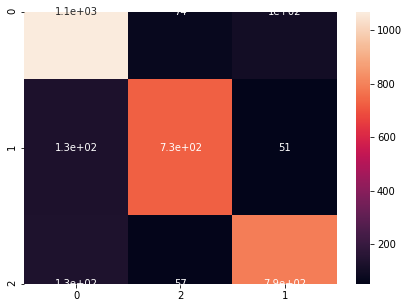

************************************************************************
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1244
           1       0.85      0.80      0.82       908
           2       0.84      0.81      0.82       981

    accuracy                           0.83      3133
   macro avg       0.83      0.82      0.83      3133
weighted avg       0.83      0.83      0.83      3133

************************************************************************
Confusion Matrix


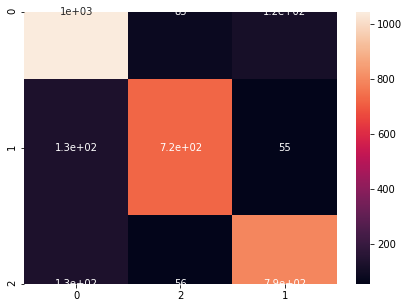

************************************************************************
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1244
           1       0.84      0.80      0.82       908
           2       0.82      0.81      0.82       981

    accuracy                           0.82      3133
   macro avg       0.82      0.82      0.82      3133
weighted avg       0.82      0.82      0.82      3133

************************************************************************
Confusion Matrix


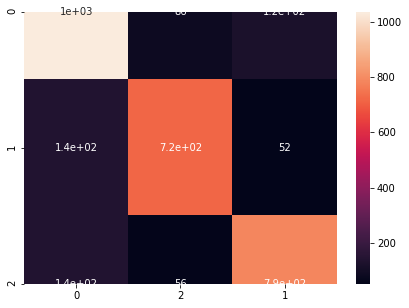

************************************************************************
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1244
           1       0.83      0.79      0.81       908
           2       0.82      0.80      0.81       981

    accuracy                           0.81      3133
   macro avg       0.81      0.81      0.81      3133
weighted avg       0.81      0.81      0.81      3133

************************************************************************
Confusion Matrix


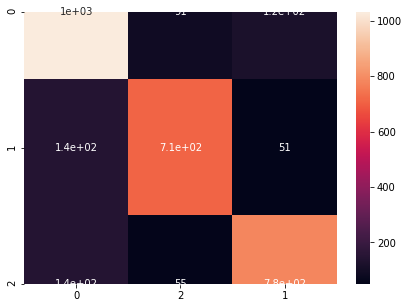

************************************************************************
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1244
           1       0.83      0.78      0.81       908
           2       0.82      0.80      0.81       981

    accuracy                           0.81      3133
   macro avg       0.81      0.80      0.81      3133
weighted avg       0.81      0.81      0.81      3133

************************************************************************


In [13]:
from sklearn import metrics
c_values=[1.0,2.0,3.0,4.0]
accuracy_1=[]
f1_score_1=[]
for i in range(len(c_values)):
    SVM = svm.SVC(C=c_values[i], kernel='linear', gamma='auto')
    SVM.fit(X_train_tfidf,Train_Y)
    predictions_SVM1 = SVM.predict(X_test_tfidf)
    accuracy = metrics.accuracy_score(Test_Y, predictions_SVM1)
    f1_Score = metrics.f1_score(Test_Y, predictions_SVM1,pos_label=1, average='macro')
    accuracy_1.append(accuracy)
    f1_score_1.append(f1_Score)

    print("Confusion Matrix");
    cm=confusion_matrix(Test_Y, predictions_SVM1)
    df_cm = pd.DataFrame(cm, index = [i for i in "012"],
                  columns = [i for i in "021"])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True)
    plt.show()
    print("************************************************************************")
    print(cr(Test_Y , predictions_SVM1))
    print("************************************************************************")

In [14]:
print(accuracy_1)
print(f1_score_1)

[0.8260453239706351, 0.8177465687839132, 0.8104053622725822, 0.8062559846792212]
[0.8255282420533622, 0.8175378525511162, 0.8105170392599456, 0.8064448876986793]


D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix


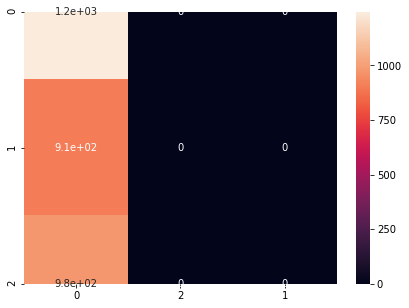

************************************************************************
              precision    recall  f1-score   support

           0       0.40      1.00      0.57      1244
           1       0.00      0.00      0.00       908
           2       0.00      0.00      0.00       981

    accuracy                           0.40      3133
   macro avg       0.13      0.33      0.19      3133
weighted avg       0.16      0.40      0.23      3133

************************************************************************


D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix


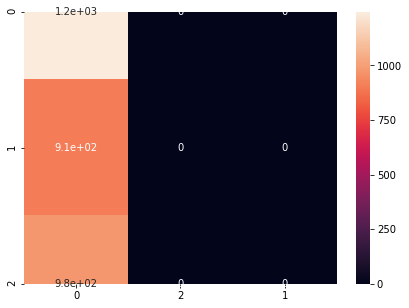

************************************************************************
              precision    recall  f1-score   support

           0       0.40      1.00      0.57      1244
           1       0.00      0.00      0.00       908
           2       0.00      0.00      0.00       981

    accuracy                           0.40      3133
   macro avg       0.13      0.33      0.19      3133
weighted avg       0.16      0.40      0.23      3133

************************************************************************
Confusion Matrix


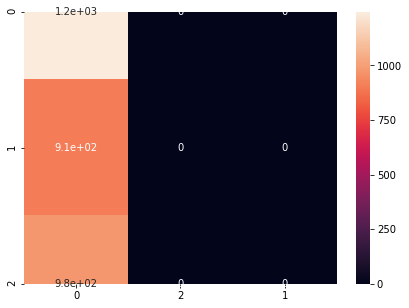

************************************************************************
              precision    recall  f1-score   support

           0       0.40      1.00      0.57      1244
           1       0.00      0.00      0.00       908
           2       0.00      0.00      0.00       981

    accuracy                           0.40      3133
   macro avg       0.13      0.33      0.19      3133
weighted avg       0.16      0.40      0.23      3133

************************************************************************
Confusion Matrix


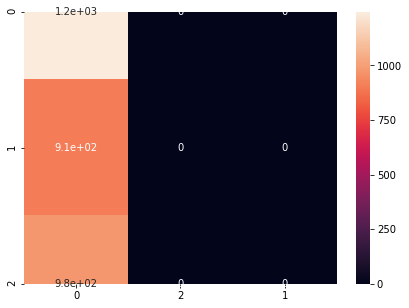

************************************************************************
              precision    recall  f1-score   support

           0       0.40      1.00      0.57      1244
           1       0.00      0.00      0.00       908
           2       0.00      0.00      0.00       981

    accuracy                           0.40      3133
   macro avg       0.13      0.33      0.19      3133
weighted avg       0.16      0.40      0.23      3133

************************************************************************


In [15]:
from sklearn import metrics
c_values=[1.0,2.0,3.0,4.0]
accuracy_2=[]
f1_score_2=[]
for i in range(len(c_values)):
    SVM = svm.SVC(C=c_values[i], kernel='poly', gamma='auto')
    SVM.fit(X_train_tfidf,Train_Y)
    predictions_SVM2 = SVM.predict(X_test_tfidf)
    accuracy = metrics.accuracy_score(Test_Y, predictions_SVM2)
    f1_Score = metrics.f1_score(Test_Y, predictions_SVM2,pos_label=1, average='macro')
    #print(accuracy)
    #print(f1_score)
    accuracy_2.append(accuracy)
    f1_score_2.append(f1_Score)
    
    print("Confusion Matrix");
    cm=confusion_matrix(Test_Y, predictions_SVM2)
    df_cm = pd.DataFrame(cm, index = [i for i in "012"],
                  columns = [i for i in "021"])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True)
    plt.show()
    print("************************************************************************")
    print(cr(Test_Y , predictions_SVM2))
    print("************************************************************************")

In [16]:
print(accuracy_2)
print(f1_score_2)

[0.3970635173954676, 0.3970635173954676, 0.3970635173954676, 0.3970635173954676]
[0.18947528748762468, 0.18947528748762468, 0.18947528748762468, 0.18947528748762468]


Confusion Matrix


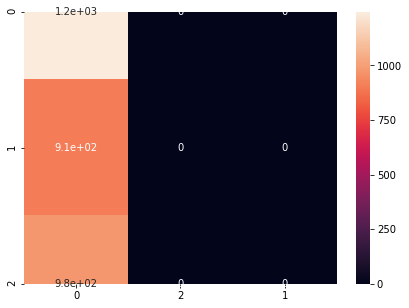

************************************************************************
              precision    recall  f1-score   support

           0       0.40      1.00      0.57      1244
           1       0.00      0.00      0.00       908
           2       0.00      0.00      0.00       981

    accuracy                           0.40      3133
   macro avg       0.13      0.33      0.19      3133
weighted avg       0.16      0.40      0.23      3133

************************************************************************
Confusion Matrix


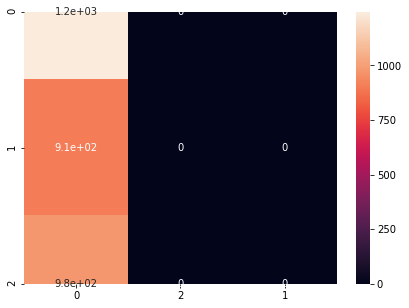

************************************************************************
              precision    recall  f1-score   support

           0       0.40      1.00      0.57      1244
           1       0.00      0.00      0.00       908
           2       0.00      0.00      0.00       981

    accuracy                           0.40      3133
   macro avg       0.13      0.33      0.19      3133
weighted avg       0.16      0.40      0.23      3133

************************************************************************
Confusion Matrix


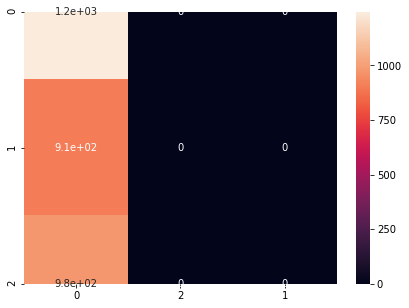

************************************************************************
              precision    recall  f1-score   support

           0       0.40      1.00      0.57      1244
           1       0.00      0.00      0.00       908
           2       0.00      0.00      0.00       981

    accuracy                           0.40      3133
   macro avg       0.13      0.33      0.19      3133
weighted avg       0.16      0.40      0.23      3133

************************************************************************
Confusion Matrix


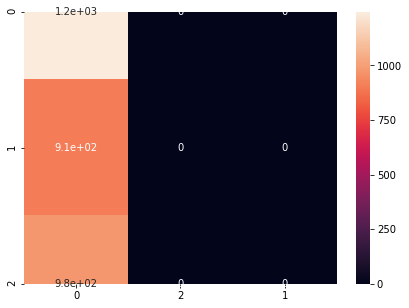

************************************************************************
              precision    recall  f1-score   support

           0       0.40      1.00      0.57      1244
           1       0.00      0.00      0.00       908
           2       0.00      0.00      0.00       981

    accuracy                           0.40      3133
   macro avg       0.13      0.33      0.19      3133
weighted avg       0.16      0.40      0.23      3133

************************************************************************


In [17]:
from sklearn import metrics
c_values=[1.0,2.0,3.0,4.0]
accuracy_3=[]
f1_score_3=[]
for i in range(len(c_values)):
    SVM = svm.SVC(C=c_values[i], kernel='rbf', gamma='auto')
    SVM.fit(X_train_tfidf,Train_Y)
    predictions_SVM3 = SVM.predict(X_test_tfidf)
    accuracy = metrics.accuracy_score(Test_Y, predictions_SVM3)
    f1_Score = metrics.f1_score(Test_Y, predictions_SVM3,pos_label=1, average='macro')
    #print(accuracy)
    #print(f1_score)
    accuracy_3.append(accuracy)
    f1_score_3.append(f1_Score)
    
    print("Confusion Matrix");
    cm=confusion_matrix(Test_Y, predictions_SVM3)
    df_cm = pd.DataFrame(cm, index = [i for i in "012"],
                  columns = [i for i in "021"])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True)
    plt.show()
    print("************************************************************************")
    print(cr(Test_Y , predictions_SVM3))
    print("************************************************************************")

In [18]:
print(accuracy_3)
print(f1_score_3)

[0.3970635173954676, 0.3970635173954676, 0.3970635173954676, 0.3970635173954676]
[0.18947528748762468, 0.18947528748762468, 0.18947528748762468, 0.18947528748762468]
